In [1]:
import mido

In [7]:
test_file_path = "./midi/test1.mid"
# test_file_path = "./test_track_1.mid"

midi_file = mido.MidiFile(test_file_path)

for track in midi_file.tracks[1]:
    print(track)
    # print(midi_file.ticks_per_beat)
    # break
# print(len(midi_file.tracks))

# print(type(midi_file.tracks))

MetaMessage('midi_port', port=0, time=0)
MetaMessage('track_name', name='Acoustic Bass', time=0)
control_change channel=0 control=7 value=100 time=0
control_change channel=0 control=10 value=90 time=0
control_change channel=0 control=91 value=127 time=0
control_change channel=0 control=93 value=40 time=0
control_change channel=0 control=0 value=0 time=240
control_change channel=0 control=32 value=0 time=1
program_change channel=0 program=24 time=1
control_change channel=0 control=7 value=100 time=1
control_change channel=0 control=10 value=90 time=0
note_on channel=0 note=45 velocity=52 time=717
note_on channel=0 note=33 velocity=36 time=0
note_on channel=0 note=33 velocity=0 time=1920
note_on channel=0 note=45 velocity=0 time=0
note_on channel=0 note=35 velocity=36 time=0
note_on channel=0 note=47 velocity=52 time=0
note_on channel=0 note=47 velocity=0 time=1920
note_on channel=0 note=35 velocity=0 time=0
note_on channel=0 note=38 velocity=34 time=0
note_on channel=0 note=50 velocity=

In [5]:
import copy

def extractMidiTrack(file_name, track_idx=1):
    old_midi = mido.MidiFile(file_name)
    
    if track_idx == 6:
        old_midi.tracks[track_idx][2].program = 0
    
    new_midi = copy.deepcopy(old_midi)
    
    new_midi.tracks = []
    new_midi.tracks.append(old_midi.tracks[0])
    new_midi.tracks.append(old_midi.tracks[track_idx])

    # for track in new_midi.tracks:
    #     print(track)

    new_file_name = "./test_track_" + str(track_idx) + ".mid"
    new_midi.save(new_file_name)
    print(new_midi.length)
    print(new_midi.ticks_per_beat)

extractMidiTrack(test_file_path)

166.36359200000095
120


In [65]:
def isValid(track): # no overlap + have notes + TODO: filter drums
    have_note = False
    for idx in range(len(track)-1):
        curr_note = track[idx]
        next_note = track[idx+1]
        if curr_note.type == "note_on" and curr_note.velocity > 0:
            have_note = True
            if next_note.type == "note_on" and next_note.velocity > 0:
                return False
    return have_note


isValid(midi_file.tracks[5])

True

In [66]:
for idx in range(len(midi_file.tracks)):
    extractMidiTrack(test_file_path, idx)
    print(idx, isValid(midi_file.tracks[idx]))

0
120
0 False
166.36359200000095
120
1 True
174.54540800000052
120
2 False
173.18177200000065
120
3 False
174.5454080000003
120
4 False
174.54540800000072
120
5 True
111.81815200000027
120
6 True
0
120
7 False
0
120
8 False
0
120
9 False
173.18177200000036
120
10 False
0
120
11 False
0
120
12 False
0
120
13 False
0
120
14 False
0
120
15 False
0
120
16 False


In [55]:
print(midi_file.tracks[6])

MidiTrack([
  MetaMessage('midi_port', port=0, time=0),
  MetaMessage('track_name', name='Snow, Wolf', time=0),
  Message('program_change', channel=5, program=24, time=0),
  Message('control_change', channel=5, control=7, value=127, time=0),
  Message('control_change', channel=5, control=10, value=63, time=0),
  Message('note_on', channel=5, note=67, velocity=100, time=16200),
  Message('note_on', channel=5, note=67, velocity=0, time=30),
  Message('note_on', channel=5, note=69, velocity=100, time=0),
  Message('note_on', channel=5, note=69, velocity=0, time=30),
  Message('note_on', channel=5, note=70, velocity=100, time=0),
  Message('note_on', channel=5, note=70, velocity=0, time=60),
  Message('note_on', channel=5, note=77, velocity=100, time=0),
  Message('note_on', channel=5, note=77, velocity=0, time=30),
  Message('note_on', channel=5, note=75, velocity=100, time=0),
  Message('note_on', channel=5, note=75, velocity=0, time=120),
  Message('note_on', channel=5, note=72, velocit

<BarContainer object of 35 artists>

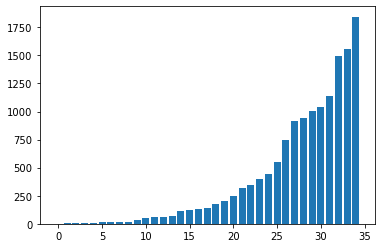

In [13]:
import matplotlib.pyplot as plt
avg_note_times = [30.083333333333332, 13.263157894736842, 202.5, 11.343478260869565, 130.49214659685865, 7.066361556064074, 120.33802816901408, 177.35593220338984, 398.0952380952381, 17.966101694915253, 1005.0, 58.506702412868634, 1038.6666666666667, 51.42857142857143, 743.1111111111111, 73.86018237082067, 322.69662921348316, 1493.6842105263158, 136.87328767123287, 443.13690476190476, 64.93333333333334, 552.0, 19.57369942196532, 912.8421052631579, 4.9375, 938.2702702702703, 6.8, 16.671641791044777, 2.6404715127701377, 114.8952380952381, 250.02666666666667, 343.0, 1133.929411764706, 1844.3076923076924, 1559.4146341463415]
plt.bar(range(len(avg_note_times)), sorted(avg_note_times))


In [21]:
print(len(avg_note_times))
print(len([x for x in avg_note_times if x < 50]))
print(len([x for x in avg_note_times if x > 1000]))

35
10
6


In [20]:
20/35

0.5714285714285714